Gradient Boosting in python using scikit-learn
http://benalexkeen.com/gradient-boosting-in-python-using-scikit-learn/

Gradient boosting has become a big part of Kaggle competition winners’ toolkits. It was initially explored in earnest by Jerome Friedman in the paper Greedy Function Approximation: A Gradient Boosting Machine. In this post we’ll take a look at gradient boosting and its use in python with the scikit-learn library.

Gradient boosting is a boosting ensemble method.

Ensemble machine learning methods are ones in which a number of predictors are aggregated to form a final prediction, which has lower bias and variance than any of the individual predictors.

Ensemble machine learning methods come in 2 different flavours – bagging and boosting.

    Bagging is a technique in which many predictors are trained independently of one another and then they are aggregated afterwards using an average (majority vote/mode, mean, weighted mean). Random forests are an example of bagging.
    Boosting is a technique in which the predictors are trained sequentially (the error of one stage is passed as input into the next stage).

Gradient boosting produces an ensemble of decision trees that, on their own, are weak decision models. Let’s take a look at how this model works.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


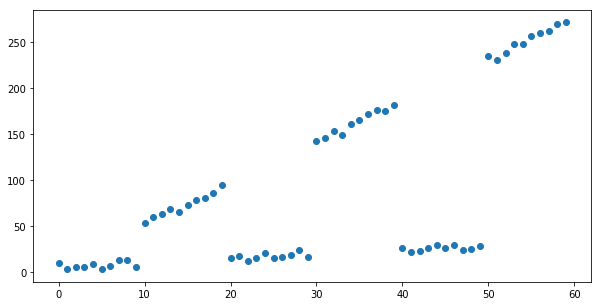

In [11]:
# Mock data
x = np.arange(0, 60)
y = map(lambda x: x / 2 + (x // 10) % 2 * 20 * x / 5 + np.random.random() * 10, x)
y = list(y)
x = pd.DataFrame({'x': x})
#print('y',x/2 + x//10)
# Plot mock data
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

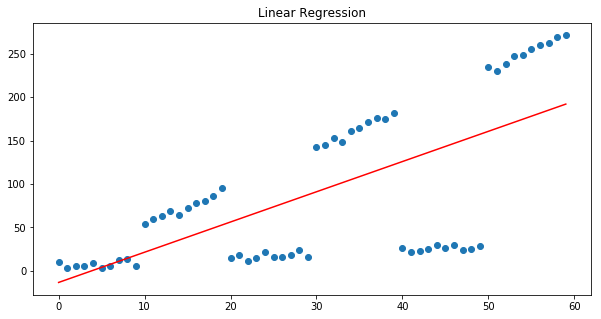

In [12]:
linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title("Linear Regression")
plt.scatter(x, y)
plt.plot(x, linear_regressor.predict(x), color='r')
plt.show()

Linear regression models aim to minimise the squared error between the prediction and the actual output and it is clear from our pattern of residuals that the sum of the residual errors is approximately 0:

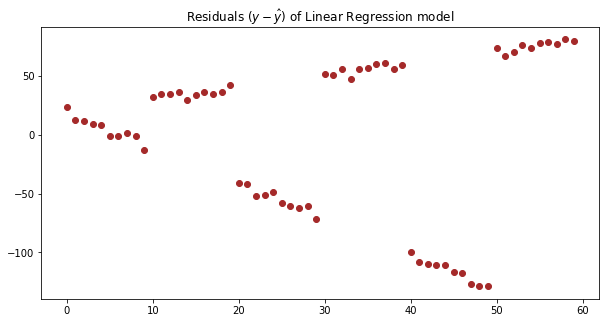

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
plt.scatter(x, y - linear_regressor.predict(x), color='brown')
plt.show()



It is also clear from this plot that there is a pattern in the residual errors, these are not random errors. We could fit model to the error terms from the output of the first model.

This is the idea behind boosting.

Gradient Boosting

Gradient boosting uses a set of decision trees in series in an ensemble to predict y.

So let’s start with a Gradient Boosting regression model that has just 1 estimator and a tree with a depth of just 1:


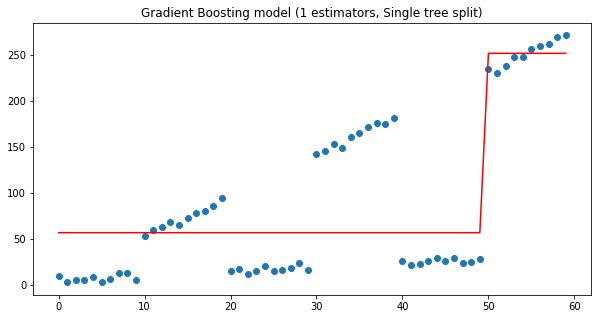

In [17]:
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()


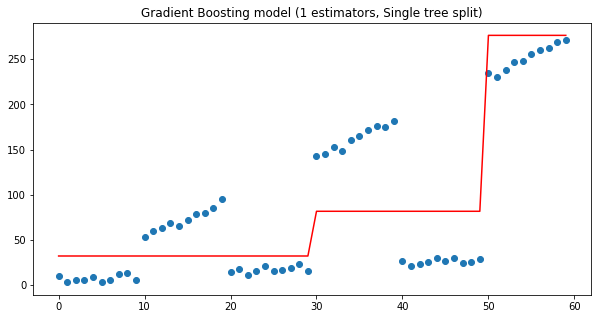

In [18]:
params['n_estimators'] = 2

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()



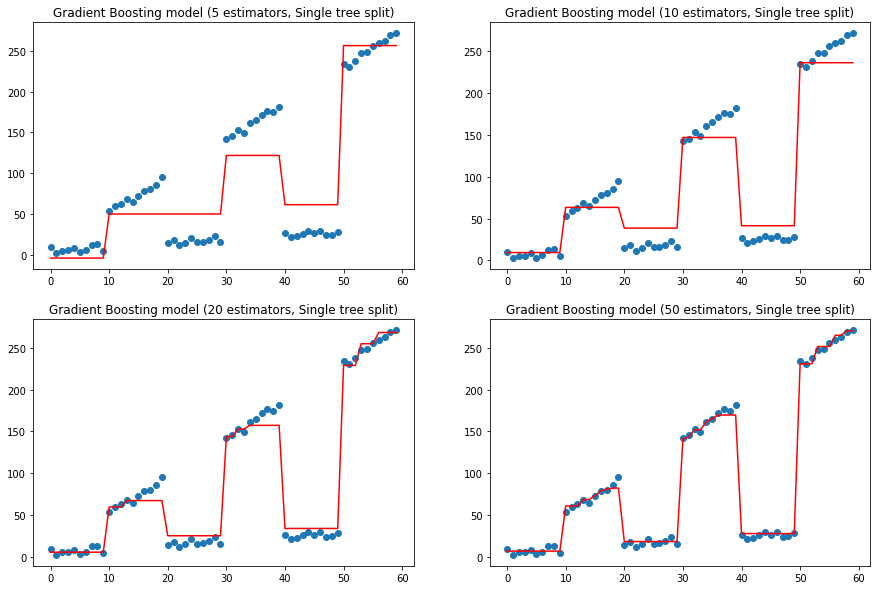

In [21]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    params['n_estimators'] = n_estimators

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model ({} estimators, Single tree split)'.format(n_estimators))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()



These models only consider a tree depth of 1 (single split).

Let’s also take a look at what happens if we increase the depth of the trees in our ensemble model, let’s take our 10 estimators gradient boosting and increase the tree depth:


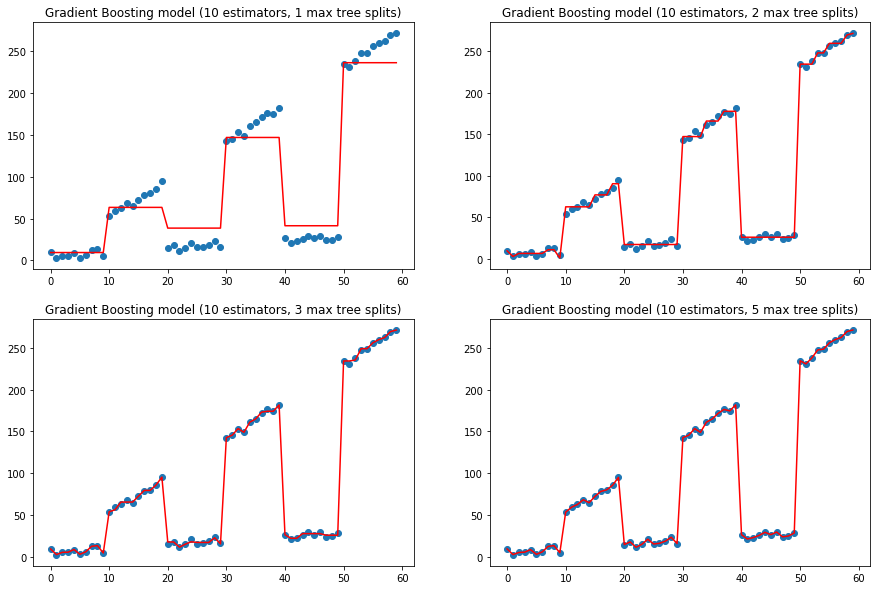

In [22]:
params['n_estimators'] = 10

f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, max_depth in enumerate([1, 2, 3, 5]):
    params['max_depth'] = max_depth

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model (10 estimators, {} max tree splits)'.format(max_depth))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()



We can see how increasing the both the estimators and the max depth, we get a better approximation of y but we can start to make the model somewhat prone to overfitting.

Therefore it is imperative to make sure we are using validation splits/cross-validation to make sure we are not overfitting our Gradient Boosting models.
